Saving datos_ventas_inf.csv to datos_ventas_inf (2).csv
🔹 MAE (real): 217,044.56 unidades
🔹 RMSE (real): 258,503.87 unidades
🔹 MAPE (real): 23.61%
🔹 BIAS (real): -186,510.37 unidades


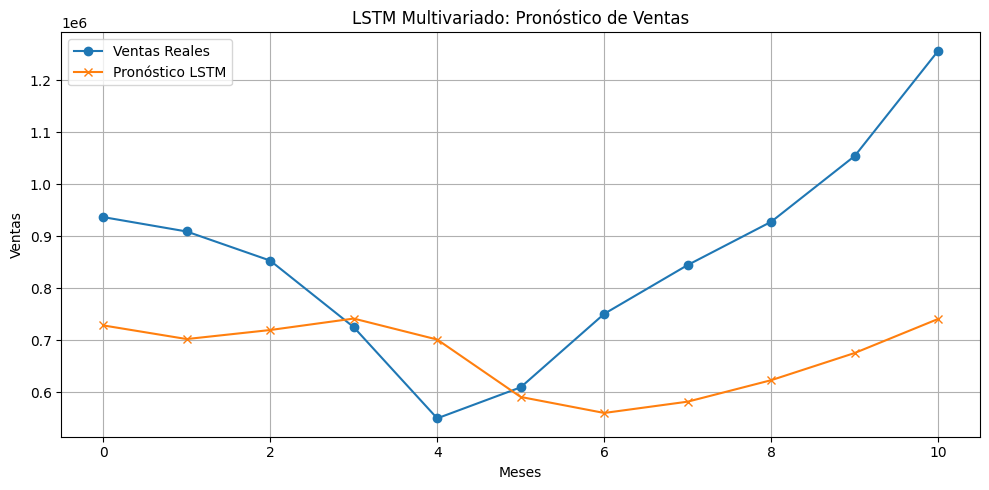

In [ ]:
# Paso 1: Instalar dependencias
!pip install -q tensorflow scikit-learn

# Paso 2: Subir archivo CSV
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Paso 3: Leer y ordenar datos
df = pd.read_csv("datos_ventas_inf.csv")
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m")
df = df.sort_values("fecha")

# Paso 4: Escalado y preparación
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Ajustar un scaler SOLO para la columna "venta"
scaler_ventas = MinMaxScaler()
scaler_ventas.fit(df[["venta"]])  # usa el df original

# 2. Reescalar las predicciones y los valores reales a escala original
y_real_real = scaler_ventas.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_real = scaler_ventas.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 3. Calcular métricas en escala real
mae_real = mean_absolute_error(y_real_real, y_pred_real)
rmse_real = np.sqrt(mean_squared_error(y_real_real, y_pred_real))

# Evitar división por cero para el MAPE
non_zero = y_real_real != 0
mape_real = np.mean(np.abs((y_real_real[non_zero] - y_pred_real[non_zero]) / y_real_real[non_zero])) * 100

# Calcular BIAS
bias_real = np.mean(y_pred_real - y_real_real)

# 4. Mostrar resultados
print(f"🔹 MAE (real): {mae_real:,.2f} unidades")
print(f"🔹 RMSE (real): {rmse_real:,.2f} unidades")
print(f"🔹 MAPE (real): {mape_real:.2f}%")
print(f"🔹 BIAS (real): {bias_real:,.2f} unidades")

# Paso 8: Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_real_real, label="Ventas Reales", marker="o")
plt.plot(y_pred_real, label="Pronóstico LSTM", marker="x")
plt.title("LSTM Multivariado: Pronóstico de Ventas")
plt.xlabel("Meses")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
